# api 가져오기 -날씨예보

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime
import pandas as pd

In [ ]:
API_KEY = 'n7HGFdM5lxrVbJFvjkmt1+Uypx7GIUZEt2xJ0QTV5MMTm/r9h6WubvwOv+NMdpkv1yefq5hVvvr9oeyK3WxNNw=='
today = datetime.now().strftime('%Y%m%d')+'0600'
today

'202301090600'

In [ ]:
# 해상날씨정보 (파고)
url_sea = 'https://apis.data.go.kr/1360000/MidFcstInfoService/getMidSeaFcst'
params_sea ={'serviceKey' : API_KEY, 
'dataType' : 'json', 
'pageNo' : '1', 
'numOfRows' : '10', 
'regId' : '12B10000',
'tmFc' : today }

In [ ]:
resp_sea = requests.get(url_sea, params=params_sea, verify=False)
data_sea_list = json.loads(resp_sea.text)['response']['body']['items']['item']

/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:842: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn((


In [ ]:
df_sea = pd.json_normalize(data_sea_list)

In [ ]:
df_sea.T

,0
regId,12B10000
wf3Am,구름많음
wf3Pm,구름많음
wf4Am,흐리고 비
wf4Pm,흐리고 비
wf5Am,흐리고 비
wf5Pm,흐리고 비
wf6Am,흐리고 비
wf6Pm,흐리고 비
wf7Am,흐림


In [ ]:
pd.set_option('display.max_columns', None)
df_sea.iloc[:,14:]

,wh3AAm,wh3APm,wh3BAm,wh3BPm,wh4AAm,wh4APm,wh4BAm,wh4BPm,wh5AAm,wh5APm,wh5BAm,wh5BPm,wh6AAm,wh6APm,wh6BAm,wh6BPm,wh7AAm,wh7APm,wh7BAm,wh7BPm,wh8A,wh8B,wh9A,wh9B,wh10A,wh10B
0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0,2.0


In [ ]:
df_sea.iloc[:,39]

0    2.0
Name: wh10B, dtype: float64

In [ ]:
df_sea_e = pd.DataFrame()
df_sea_e['whHigh3'] = (df_sea.iloc[:,16] + df_sea.iloc[:,17])/2
df_sea_e['whHigh4'] = (df_sea.iloc[:,20] + df_sea.iloc[:,21])/2
df_sea_e['whHigh5'] = (df_sea.iloc[:,24] + df_sea.iloc[:,25])/2
df_sea_e['whHigh6'] = (df_sea.iloc[:,28] + df_sea.iloc[:,29])/2
df_sea_e['whHigh7'] = (df_sea.iloc[:,32] + df_sea.iloc[:,33])/2
df_sea_e['whHigh8'] = df_sea.iloc[:,35]
df_sea_e['whHigh9'] = df_sea.iloc[:,37]
df_sea_e['whHigh10'] = df_sea.iloc[:,39]
df_sea_e['whAvg3'] = (((df_sea.iloc[:,14] + df_sea.iloc[:,15])/2) + df_sea_e['whHigh3'])/2
df_sea_e['whAvg4'] = (((df_sea.iloc[:,18] + df_sea.iloc[:,19])/2) + df_sea_e['whHigh3'])/2
df_sea_e['whAvg5'] = (((df_sea.iloc[:,22] + df_sea.iloc[:,23])/2) + df_sea_e['whHigh3'])/2
df_sea_e['whAvg6'] = (((df_sea.iloc[:,26] + df_sea.iloc[:,27])/2) + df_sea_e['whHigh3'])/2
df_sea_e['whAvg7'] = (((df_sea.iloc[:,30] + df_sea.iloc[:,31])/2) + df_sea_e['whHigh3'])/2
df_sea_e['whAvg8'] = (df_sea.iloc[:,34] + df_sea.iloc[:,35])/2
df_sea_e['whAvg9'] = (df_sea.iloc[:,36] + df_sea.iloc[:,37])/2
df_sea_e['whAvg10'] = (df_sea.iloc[:,38] + df_sea.iloc[:,39])/2
df_sea_e

,whHigh3,whHigh4,whHigh5,whHigh6,whHigh7,whHigh8,whHigh9,whHigh10,whAvg3,whAvg4,whAvg5,whAvg6,whAvg7,whAvg8,whAvg9,whAvg10
0,2.0,3.0,2.5,4.0,3.0,2.0,2.0,2.0,1.5,1.5,1.75,2.0,1.5,1.5,1.5,1.5


In [ ]:
df_sea_e.columns

Index(['whHigh3', 'whHigh4', 'whHigh5', 'whHigh6', 'whHigh7', 'whHigh8',
       'whHigh9', 'whHigh10', 'whAvg3', 'whAvg4', 'whAvg5', 'whAvg6', 'whAvg7',
       'whAvg8', 'whAvg9', 'whAvg10'],
      dtype='object')

In [ ]:
col_order= ['whAvg3', 'whHigh3', 'whAvg4', 'whHigh4', 'whAvg5', 'whHigh5', 'whAvg6', 'whHigh6', 
            'whAvg7', 'whHigh7', 'whAvg8', 'whHigh8', 'whAvg9', 'whHigh9', 'whAvg10', 'whHigh10']
df_sea_e = df_sea_e[col_order]

In [ ]:
df_sea_e

,whAvg3,whHigh3,whAvg4,whHigh4,whAvg5,whHigh5,whAvg6,whHigh6,whAvg7,whHigh7,whAvg8,whHigh8,whAvg9,whHigh9,whAvg10,whHigh10
0,1.5,2.0,1.5,3.0,1.75,2.5,2.0,4.0,1.5,3.0,1.5,2.0,1.5,2.0,1.5,2.0


In [ ]:
# 기온정보 
url_t = 'https://apis.data.go.kr/1360000/MidFcstInfoService/getMidTa?'
params_t ={'serviceKey' : API_KEY, 
'dataType' : 'json', 
'pageNo' : '1', 
'numOfRows' : '10', 
'regId' : '11F20401',
'tmFc' : today }

In [ ]:
resp_t = requests.get(url_t, params=params_t, verify=False)
data_t_list = json.loads(resp_t.text)['response']['body']['items']['item']
df_t = pd.json_normalize(data_t_list)
df_t.T

/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:842: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn((


,0
regId,11F20401
taMin3,5
taMin3Low,1
taMin3High,1
taMax3,13
taMax3Low,1
taMax3High,0
taMin4,10
taMin4Low,1
taMin4High,3


In [ ]:
df_t_e = df_t.loc[:,['taMin3','taMax3','taMin4','taMax4','taMin5','taMax5','taMin6','taMax6','taMin7','taMax7','taMin8','taMax8','taMin9','taMax9','taMin10','taMax10']]
df_t_e['taAvg3'] = (df_t_e['taMin3'] + df_t_e['taMax3']) / 2
df_t_e['taAvg4'] = (df_t_e['taMin4'] + df_t_e['taMax4']) / 2
df_t_e['taAvg5'] = (df_t_e['taMin5'] + df_t_e['taMax5']) / 2
df_t_e['taAvg6'] = (df_t_e['taMin6'] + df_t_e['taMax6']) / 2
df_t_e['taAvg7'] = (df_t_e['taMin7'] + df_t_e['taMax7']) / 2
df_t_e['taAvg8'] = (df_t_e['taMin8'] + df_t_e['taMax8']) / 2
df_t_e['taAvg9'] = (df_t_e['taMin9'] + df_t_e['taMax9']) / 2
df_t_e['taAvg10'] = (df_t_e['taMin10'] + df_t_e['taMax10']) / 2
col_order = ['taAvg3', 'taMin3','taMax3','taAvg4', 'taMin4','taMax4','taAvg5', 'taMin5','taMax5','taAvg6', 'taMin6','taMax6',
             'taAvg7', 'taMin7','taMax7','taAvg8', 'taMin8','taMax8','taAvg9', 'taMin9','taMax9','taAvg10', 'taMin10','taMax10']
df_t_e = df_t_e[col_order]
df_t_e

,taAvg3,taMin3,taMax3,taAvg4,taMin4,taMax4,taAvg5,taMin5,taMax5,taAvg6,taMin6,taMax6,taAvg7,taMin7,taMax7,taAvg8,taMin8,taMax8,taAvg9,taMin9,taMax9,taAvg10,taMin10,taMax10
0,9.0,5,13,11.5,10,13,11.0,10,12,5.5,5,6,3.0,1,5,2.0,-1,5,2.0,-1,5,3.0,0,6


In [ ]:
# 육상날씨정보 (강수확률)
url_land = 'https://apis.data.go.kr/1360000/MidFcstInfoService/getMidLandFcst'
params_land ={'serviceKey' : API_KEY, 
'dataType' : 'json', 
'pageNo' : '1', 
'numOfRows' : '10', 
'regId' : '11F20000',
'tmFc' : today }

In [ ]:
resp_land = requests.get(url_land, params=params_land, verify=False)
data_land_list = json.loads(resp_land.text)['response']['body']['items']['item']
df_land = pd.json_normalize(data_land_list)
df_land.T

/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:842: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn((


,0
regId,11F20000
rnSt3Am,0
rnSt3Pm,40
rnSt4Am,90
rnSt4Pm,90
rnSt5Am,90
rnSt5Pm,90
rnSt6Am,40
rnSt6Pm,40
rnSt7Am,40


In [ ]:
df_land.iloc[:,1:14]

,rnSt3Am,rnSt3Pm,rnSt4Am,rnSt4Pm,rnSt5Am,rnSt5Pm,rnSt6Am,rnSt6Pm,rnSt7Am,rnSt7Pm,rnSt8,rnSt9,rnSt10
0,0,40,90,90,90,90,40,40,40,20,20,20,20


In [ ]:
df_land_e = pd.DataFrame()
df_land_e['rain3'] = (df_land['rnSt3Am'] + df_land['rnSt3Pm']) / 2
df_land_e['rain4'] = (df_land['rnSt4Am'] + df_land['rnSt4Pm']) / 2
df_land_e['rain5'] = (df_land['rnSt5Am'] + df_land['rnSt5Pm']) / 2
df_land_e['rain6'] = (df_land['rnSt6Am'] + df_land['rnSt6Pm']) / 2
df_land_e['rain7'] = (df_land['rnSt7Am'] + df_land['rnSt7Pm']) / 2
df_land_e['rain8'] = df_land['rnSt8']
df_land_e['rain9'] = df_land['rnSt9']
df_land_e['rain10'] = df_land['rnSt10']
df_land_e

,rain3,rain4,rain5,rain6,rain7,rain8,rain9,rain10
0,20.0,90.0,90.0,40.0,30.0,20,20,20


In [ ]:
# 과거 데이터는 Rainfall 강수량으로 들어가있으나, 미래데이터는 강수확률이므로
# 강수량과 동일한 수준으로 만들기 위해 계수 0.02를 곱합(ex. 30(%) -> 0.6(mm))
df_land_e = df_land_e * 0.02
df_land_e

,rain3,rain4,rain5,rain6,rain7,rain8,rain9,rain10
0,0.4,1.8,1.8,0.8,0.6,0.4,0.4,0.4


In [ ]:
df_sea_e3 = df_sea_e.filter(regex='3')
df_sea_e3

,whAvg3,whHigh3
0,1.5,2.0


In [ ]:
# # 미래데이터(api)를 학습데이터 구조와 동일하게 생성

# # 일자별 데이터프레임 생성하는 방식
# for i in range(3,11):
#     globals()['df_day{}'.format(i)] = pd.concat([df_sea_e.filter(regex="{}".format(i)), df_t_e.filter(regex="{}".format(i)), df_land_e.filter(regex="{}".format(i))], axis=1)
#     print(globals()['df_day{}'.format(i)])
#     print("\n")
# # 잘 들어갔는지 확인
# globals()['df_day10']

In [ ]:
# 미래데이터(api)를 학습데이터 구조와 동일하게 생성

# 한 데이터프레임에 일자 컬럼 생성하고 데이터 넣는 방식
col_name = ['day','whAvg', 'whHigh', 'taAvg', 'taMin', 'taMax', 'rain']
df_predict = pd.DataFrame(columns=col_name)
for i in range(0,8):
    df_predict.loc[i,'day'] = i+3
    df_predict.iloc[i,1:] = pd.concat([df_sea_e.filter(regex="{}".format(i+3)), 
                            df_t_e.filter(regex="{}".format(i+3)), df_land_e.filter(regex="{}".format(i+3))], axis=1)
df_predict = df_predict[['day','taAvg', 'taMin', 'taMax', 'rain', 'whAvg', 'whHigh']] # 컬럼 순서변경
df_predict = df_predict.set_index('day') 
df_predict

,taAvg,taMin,taMax,rain,whAvg,whHigh
day,,,,,,
3,9.0,5.0,13.0,0.4,1.5,2.0
4,11.5,10.0,13.0,1.8,1.5,3.0
5,11.0,10.0,12.0,1.8,1.75,2.5
6,5.5,5.0,6.0,0.8,2.0,4.0
7,3.0,1.0,5.0,0.6,1.5,3.0
8,2.0,-1.0,5.0,0.4,1.5,2.0
9,2.0,-1.0,5.0,0.4,1.5,2.0
10,3.0,0.0,6.0,0.4,1.5,2.0


In [ ]:
df_predict.loc[10]

taAvg     3.0
taMin     0.0
taMax     6.0
rain      0.4
whAvg     1.5
whHigh    2.0
Name: 10, dtype: object

In [ ]:
df_predict.iloc[0,2]

13.0

# 데이터 전처리
---

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_asos = pd.read_csv('ASOS_여수_2014010120230102_기온,강수.csv', usecols=[2,3,4,5,6], encoding='cp949')
data_asos

,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm)
0,2014-01-01,7.2,3.9,10.7,NaN
1,2014-01-02,6.4,3.6,10.6,NaN
2,2014-01-03,6.7,2.5,11.3,NaN
3,2014-01-04,6.0,3.2,9.9,NaN
4,2014-01-05,4.5,1.2,9.3,NaN
...,...,...,...,...,...
3284,2022-12-29,2.2,-1.1,6.5,NaN
3285,2022-12-30,2.6,-0.5,6.8,NaN
3286,2022-12-31,2.9,-0.1,6.9,NaN
3287,2023-01-01,4.3,1.1,8.5,NaN


In [ ]:
data_buoy = pd.read_csv('CWBUOY_금오도_2014010120230102_평균,최대파고.csv', usecols=[1,2,3], encoding='cp949')
data_buoy

,일시,평균 파고(m),최고 최대 파고(m)
0,2014-01-01,0.2,0.5
1,2014-01-02,0.1,0.4
2,2014-01-03,0.1,0.4
3,2014-01-04,0.1,0.4
4,2014-01-05,0.2,0.8
...,...,...,...
3242,2022-12-29,0.1,0.5
3243,2022-12-30,0.1,0.4
3244,2022-12-31,0.1,0.5
3245,2023-01-01,0.1,0.4


In [ ]:
data = data_asos.merge(data_buoy, on=['일시'])
data

,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 파고(m),최고 최대 파고(m)
0,2014-01-01,7.2,3.9,10.7,NaN,0.2,0.5
1,2014-01-02,6.4,3.6,10.6,NaN,0.1,0.4
2,2014-01-03,6.7,2.5,11.3,NaN,0.1,0.4
3,2014-01-04,6.0,3.2,9.9,NaN,0.1,0.4
4,2014-01-05,4.5,1.2,9.3,NaN,0.2,0.8
...,...,...,...,...,...,...,...
3242,2022-12-29,2.2,-1.1,6.5,NaN,0.1,0.5
3243,2022-12-30,2.6,-0.5,6.8,NaN,0.1,0.4
3244,2022-12-31,2.9,-0.1,6.9,NaN,0.1,0.5
3245,2023-01-01,4.3,1.1,8.5,NaN,0.1,0.4


In [ ]:
data.columns = ['Date','avg_Temp', 'low_Temp','high_Temp','Rainfall','avg_WaveHeight','high_WaveHeight']

In [ ]:
data.Date = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3247 entries, 0 to 3246
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3247 non-null   datetime64[ns]
 1   avg_Temp         3247 non-null   float64       
 2   low_Temp         3247 non-null   float64       
 3   high_Temp        3247 non-null   float64       
 4   Rainfall         1134 non-null   float64       
 5   avg_WaveHeight   3191 non-null   float64       
 6   high_WaveHeight  3247 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 202.9 KB


In [ ]:
data_red = pd.read_csv('적조발생이력_2014010120230102.csv', usecols=[0,1,3], encoding='utf-8')
data_red=data_red.rename(columns={'예찰일자':'Date'})
data_red['Date'] = pd.to_datetime(data_red['Date'])
data_red=data_red.sort_values('Date', ascending=True)
data_red=data_red.reset_index(drop=True)
data_red

,Date,발생해역,밀도(개체수/mL)
0,2014-07-24,전남 여수시 돌산동만~경남 거제시 서부연안,0~.84
1,2014-08-24,여수 보돌바다,120~360
2,2014-08-25,여수 화하도~개도~월호수도,89~1150
3,2014-08-26,여수 돌산 항대~화정 자봉도~월호수도~보돌바다,10~584
4,2014-08-27,여수 돌산 항대~화정 자봉도~월호수도~보돌바다,43~250
...,...,...,...
226,2022-09-25,전남 고흥군 거금도 ∼ 여수시 돌산도 연안,NaN
227,2022-09-26,전남 고흥군 거금도 ∼ 여수시 돌산도 연안,NaN
228,2022-09-27,전남 완도군 완도 ∼ 여수시 돌산도 연안 해역\r\n,NaN
229,2022-09-28,전남 완도군 완도 ∼ 여수시 돌산도 연안 해역,NaN


In [ ]:
data_red.Date[0]

Timestamp('2014-07-24 00:00:00')

In [ ]:
data = data.merge(data_red, on='Date', how='left')
data

,Date,avg_Temp,low_Temp,high_Temp,Rainfall,avg_WaveHeight,high_WaveHeight,발생해역,밀도(개체수/mL)
0,2014-01-01,7.2,3.9,10.7,NaN,0.2,0.5,NaN,NaN
1,2014-01-02,6.4,3.6,10.6,NaN,0.1,0.4,NaN,NaN
2,2014-01-03,6.7,2.5,11.3,NaN,0.1,0.4,NaN,NaN
3,2014-01-04,6.0,3.2,9.9,NaN,0.1,0.4,NaN,NaN
4,2014-01-05,4.5,1.2,9.3,NaN,0.2,0.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3255,2022-12-29,2.2,-1.1,6.5,NaN,0.1,0.5,NaN,NaN
3256,2022-12-30,2.6,-0.5,6.8,NaN,0.1,0.4,NaN,NaN
3257,2022-12-31,2.9,-0.1,6.9,NaN,0.1,0.5,NaN,NaN
3258,2023-01-01,4.3,1.1,8.5,NaN,0.1,0.4,NaN,NaN


In [ ]:
data=data.drop_duplicates(subset=['Date']).reset_index(drop=True)
data

,Date,avg_Temp,low_Temp,high_Temp,Rainfall,avg_WaveHeight,high_WaveHeight,발생해역,밀도(개체수/mL)
0,2014-01-01,7.2,3.9,10.7,NaN,0.2,0.5,NaN,NaN
1,2014-01-02,6.4,3.6,10.6,NaN,0.1,0.4,NaN,NaN
2,2014-01-03,6.7,2.5,11.3,NaN,0.1,0.4,NaN,NaN
3,2014-01-04,6.0,3.2,9.9,NaN,0.1,0.4,NaN,NaN
4,2014-01-05,4.5,1.2,9.3,NaN,0.2,0.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3242,2022-12-29,2.2,-1.1,6.5,NaN,0.1,0.5,NaN,NaN
3243,2022-12-30,2.6,-0.5,6.8,NaN,0.1,0.4,NaN,NaN
3244,2022-12-31,2.9,-0.1,6.9,NaN,0.1,0.5,NaN,NaN
3245,2023-01-01,4.3,1.1,8.5,NaN,0.1,0.4,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3247 non-null   datetime64[ns]
 1   avg_Temp         3247 non-null   float64       
 2   low_Temp         3247 non-null   float64       
 3   high_Temp        3247 non-null   float64       
 4   Rainfall         1134 non-null   float64       
 5   avg_WaveHeight   3191 non-null   float64       
 6   high_WaveHeight  3247 non-null   float64       
 7   발생해역             218 non-null    object        
 8   밀도(개체수/mL)       165 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 228.4+ KB


In [ ]:
yn_null_ix = data[data['발생해역'].notnull()].index
data.iloc[yn_null_ix]

,Date,avg_Temp,low_Temp,high_Temp,Rainfall,avg_WaveHeight,high_WaveHeight,발생해역,밀도(개체수/mL)
201,2014-07-24,27.5,25.5,30.4,NaN,0.2,1.4,전남 여수시 돌산동만~경남 거제시 서부연안,0~.84
232,2014-08-24,24.1,23.2,25.1,48.4,0.1,0.5,여수 보돌바다,120~360
233,2014-08-25,25.0,23.6,26.6,25.4,0.2,0.7,여수 화하도~개도~월호수도,89~1150
234,2014-08-26,25.8,23.4,29.0,NaN,0.2,0.5,여수 돌산 항대~화정 자봉도~월호수도~보돌바다,10~584
235,2014-08-27,23.2,22.5,24.8,0.0,0.4,1.3,여수 돌산 항대~화정 자봉도~월호수도~보돌바다,43~250
...,...,...,...,...,...,...,...,...,...
3147,2022-09-25,20.3,19.4,21.4,NaN,0.2,0.7,전남 고흥군 거금도 ∼ 여수시 돌산도 연안,NaN
3148,2022-09-26,20.4,18.9,22.1,0.0,0.1,0.5,전남 고흥군 거금도 ∼ 여수시 돌산도 연안,NaN
3149,2022-09-27,21.9,19.1,25.8,0.0,0.2,0.6,전남 완도군 완도 ∼ 여수시 돌산도 연안 해역\r\n,NaN
3150,2022-09-28,21.8,19.7,24.8,NaN,0.2,0.7,전남 완도군 완도 ∼ 여수시 돌산도 연안 해역,NaN


In [ ]:
# 적조발생여부 컬럼 생성
data = data.rename(columns={'발생해역':'YN'})
data['YN'] = np.where(pd.notnull(data['YN']) == True, 1, 0)

In [ ]:
data.iloc[yn_null_ix]

,Date,avg_Temp,low_Temp,high_Temp,Rainfall,avg_WaveHeight,high_WaveHeight,YN,밀도(개체수/mL)
201,2014-07-24,27.5,25.5,30.4,NaN,0.2,1.4,1,0~.84
232,2014-08-24,24.1,23.2,25.1,48.4,0.1,0.5,1,120~360
233,2014-08-25,25.0,23.6,26.6,25.4,0.2,0.7,1,89~1150
234,2014-08-26,25.8,23.4,29.0,NaN,0.2,0.5,1,10~584
235,2014-08-27,23.2,22.5,24.8,0.0,0.4,1.3,1,43~250
...,...,...,...,...,...,...,...,...,...
3147,2022-09-25,20.3,19.4,21.4,NaN,0.2,0.7,1,NaN
3148,2022-09-26,20.4,18.9,22.1,0.0,0.1,0.5,1,NaN
3149,2022-09-27,21.9,19.1,25.8,0.0,0.2,0.6,1,NaN
3150,2022-09-28,21.8,19.7,24.8,NaN,0.2,0.7,1,NaN


In [ ]:
# 밀도컬럼 삭제
data = data.drop(labels='밀도(개체수/mL)',axis=1)
data

,Date,avg_Temp,low_Temp,high_Temp,Rainfall,avg_WaveHeight,high_WaveHeight,YN
0,2014-01-01,7.2,3.9,10.7,NaN,0.2,0.5,0
1,2014-01-02,6.4,3.6,10.6,NaN,0.1,0.4,0
2,2014-01-03,6.7,2.5,11.3,NaN,0.1,0.4,0
3,2014-01-04,6.0,3.2,9.9,NaN,0.1,0.4,0
4,2014-01-05,4.5,1.2,9.3,NaN,0.2,0.8,0
...,...,...,...,...,...,...,...,...
3242,2022-12-29,2.2,-1.1,6.5,NaN,0.1,0.5,0
3243,2022-12-30,2.6,-0.5,6.8,NaN,0.1,0.4,0
3244,2022-12-31,2.9,-0.1,6.9,NaN,0.1,0.5,0
3245,2023-01-01,4.3,1.1,8.5,NaN,0.1,0.4,0


In [ ]:
# 평균파고 컬럼의 결측치 대체
null_ix = data[data['avg_WaveHeight'].isnull()].index
null_ix

Int64Index([ 275,  364,  365,  367,  368,  554,  602,  603,  605,  608,  609,
             610,  903, 1194, 1195, 1196, 1347, 1348, 1678, 1679, 1700, 1701,
            1702, 1874, 1875, 2032, 2033, 2103, 2104, 2174, 2175, 2374, 2439,
            2440, 2790, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800,
            2801, 2802, 2803, 2804, 2806, 2807, 2808, 2809, 2810, 2811, 2812,
            2901],
           dtype='int64')

In [ ]:
data['avg_WaveHeight'] = np.where(pd.notnull(data['avg_WaveHeight']) == True, data['avg_WaveHeight'], data['high_WaveHeight']/2)

In [ ]:
data.iloc[null_ix]

,Date,avg_Temp,low_Temp,high_Temp,Rainfall,avg_WaveHeight,high_WaveHeight,YN
275,2014-10-06,18.8,15.6,22.4,NaN,0.50,1.0,0
364,2015-01-03,1.1,-3.8,6.5,NaN,0.25,0.5,0
365,2015-01-04,6.2,2.2,11.5,NaN,0.15,0.3,0
367,2015-01-06,5.7,0.1,11.8,9.4,0.30,0.6,0
368,2015-01-09,3.3,0.0,6.9,NaN,0.20,0.4,0
554,2015-07-14,23.7,21.5,26.3,NaN,0.30,0.6,0
602,2015-08-31,24.3,22.0,26.7,0.0,0.10,0.2,1
603,2015-09-01,23.0,21.7,24.8,2.7,0.20,0.4,1
605,2015-09-03,24.2,21.1,27.2,0.7,0.15,0.3,1
608,2015-09-06,22.0,19.2,25.9,14.8,0.40,0.8,1


In [ ]:
# Rainfall 컬럼의 결측치를 0으로 대체
data['Rainfall']=data['Rainfall'].fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3247 non-null   datetime64[ns]
 1   avg_Temp         3247 non-null   float64       
 2   low_Temp         3247 non-null   float64       
 3   high_Temp        3247 non-null   float64       
 4   Rainfall         3247 non-null   float64       
 5   avg_WaveHeight   3247 non-null   float64       
 6   high_WaveHeight  3247 non-null   float64       
 7   YN               3247 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 203.1 KB


In [ ]:
data.to_csv('Data.csv', index=False)

# db 저장 및 모델 구축
---


In [ ]:
pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.7 MB/s eta 0:00:00


In [ ]:
import pymysql

In [ ]:
# def mysql_save(data):
#     conn=pymysql.connect(host='localhost',
#                         user='root',
#                         password='dkzndkakfls!0',
#                         db='MySQL80',
#                         charset='utf8')
#     cursor=conn.cursor("insert into festival(festival_title,festival_addr,usage_day,festival_area,homepage,thumb,traffic,lat,lng) values(%s,%s,%s,%s,%s,%s,%s,%s,%s)")
    

In [ ]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df=data.copy()

target = 'YN'

train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)
print(train.shape, val.shape, test.shape)

(2077, 8) (520, 8) (650, 8)


In [ ]:
# 특성, 타겟 분리
features = train.drop(columns=[target, 'Date']).columns
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
X_train

,avg_Temp,low_Temp,high_Temp,Rainfall,avg_WaveHeight,high_WaveHeight
601,23.8,21.5,27.0,0.0,0.0,0.2
98,14.1,12.1,17.0,0.0,0.3,0.9
3181,16.3,14.3,19.7,0.0,0.4,1.3
1671,27.5,26.4,29.8,3.9,0.2,0.6
340,8.4,5.5,11.9,0.0,0.3,0.9
...,...,...,...,...,...,...
768,12.9,11.8,14.6,14.3,0.4,1.5
3216,7.5,3.9,9.7,0.0,0.1,0.3
204,24.4,21.7,29.0,0.0,0.2,0.7
2303,17.3,15.6,20.4,0.0,0.1,0.4


In [ ]:
# 기준모델
logis = LogisticRegression(random_state=42)
logis.fit(X_train, y_train)

print('훈련 Accuracy Score:',logis.score(X_train, y_train).round(4))
y_pred = logis.predict(X_val)
print('검증 Accuracy Score:',accuracy_score(y_val, y_pred).round(4))
print('검증 F1 Score:',f1_score(y_val, y_pred).round(4))
y_pred_proba = logis.predict_proba(X_val)[:,-1]
print('검증 AUC Score:', roc_auc_score(y_val, y_pred_proba).round(4))
print(classification_report(y_val, y_pred))
print("---------------------------------------------")

훈련 Accuracy Score: 0.9316
검증 Accuracy Score: 0.9327
검증 F1 Score: 0.0
검증 AUC Score: 0.8762
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       485
           1       0.00      0.00      0.00        35

    accuracy                           0.93       520
   macro avg       0.47      0.50      0.48       520
weighted avg       0.87      0.93      0.90       520

---------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from scipy.stats import randint, uniform
# RandomForest 모델 학습
rf = RandomForestClassifier(random_state=42)

dists = {
    'n_estimators': randint(50, 400), 
    'max_depth' : [None,5,10,15,20],
    'max_samples' : [None,0.2,0.4,0.7,1.0],
    'min_samples_leaf' : [1,3,6,9,15]
}

clf = RandomizedSearchCV(
    rf,
    param_distributions = dists,
    n_iter = 30,
    cv = 3,
    scoring = 'roc_auc',
    verbose = 1,
    n_jobs = -1,
    random_state = 42
)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_samples': [None, 0.2, 0.4, 0.7,
                                                        1.0],
                                        'min_samples_leaf': [1, 3, 6, 9, 15],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fda6ecb7790>},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('auc : ', clf.best_score_)

최적 하이퍼파라미터:  {'max_depth': 20, 'max_samples': 0.4, 'min_samples_leaf': 9, 'n_estimators': 263}
auc :  0.8845078564070841


In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,28,18,8,13,9,23,2,11,15,16,14,20,0,25,7,12,17,4,26,24,27,5,19,29,3,1,6,10,22,21
mean_fit_time,0.661301,1.200184,1.968504,1.764821,1.776578,0.648732,0.475723,1.470695,1.566635,0.540506,0.565105,0.680593,0.457799,0.927898,1.209422,2.041185,1.610416,1.263567,0.19002,0.574915,0.238706,0.477467,0.760979,0.705383,2.318307,0.904824,0.599376,0.845551,1.964091,0.763253
std_fit_time,0.015731,0.234999,0.055079,0.168081,0.02976,0.141913,0.066654,0.148103,0.266932,0.038544,0.044771,0.003596,0.058452,0.009106,0.041432,0.09613,0.121733,0.039857,0.008705,0.017729,0.003046,0.099887,0.003248,0.032164,0.021449,0.053384,0.056309,0.127767,0.561851,0.120047
mean_score_time,0.072652,0.085685,0.208525,0.132126,0.204169,0.052089,0.045941,0.153732,0.234332,0.073491,0.060135,0.067671,0.056509,0.084122,0.136237,0.179869,0.152004,0.17944,0.023625,0.058899,0.025985,0.048803,0.083092,0.065958,0.223158,0.080248,0.058369,0.089717,0.168085,0.081197
std_score_time,0.001301,0.019402,0.023645,0.044072,0.025002,0.00057,0.002771,0.044457,0.04328,0.017726,0.009289,0.001903,0.015351,0.000827,0.018038,0.053594,0.030038,0.047376,0.000361,0.000473,0.000553,0.022419,0.001069,0.015063,0.009119,0.007808,0.02036,0.034122,0.045422,0.018092
param_max_depth,20,15,10,15,None,None,10,15,15,20,10,5,15,10,10,5,5,15,5,10,None,None,20,10,10,20,20,20,20,15
param_max_samples,0.4,None,0.7,0.7,0.4,None,0.4,0.2,0.2,0.2,None,None,1.0,None,0.4,1.0,0.2,0.2,0.2,0.4,0.7,0.7,0.2,0.4,1.0,1.0,0.7,None,None,1.0
param_min_samples_leaf,9,15,9,9,15,9,15,3,3,3,9,9,6,6,3,3,9,9,1,1,3,3,15,1,3,3,1,3,1,1
param_n_estimators,263,257,369,313,356,185,149,314,309,93,99,237,121,310,237,389,319,326,77,212,82,71,329,276,393,264,98,138,376,206
params,"{'max_depth': 20, 'max_samples': 0.4, 'min_sam...","{'max_depth': 15, 'max_samples': None, 'min_sa...","{'max_depth': 10, 'max_samples': 0.7, 'min_sam...","{'max_depth': 15, 'max_samples': 0.7, 'min_sam...","{'max_depth': None, 'max_samples': 0.4, 'min_s...","{'max_depth': None, 'max_samples': None, 'min_...","{'max_depth': 10, 'max_samples': 0.4, 'min_sam...","{'max_depth': 15, 'max_samples': 0.2, 'min_sam...","{'max_depth': 15, 'max_samples': 0.2, 'min_sam...","{'max_depth': 20, 'max_samples': 0.2, 'min_sam...","{'max_depth': 10, 'max_samples': None, 'min_sa...","{'max_depth': 5, 'max_samples': None, 'min_sam...","{'max_depth': 15, 'max_samples': 1.0, 'min_sam...","{'max_depth': 10, 'max_samples': None, 'min_sa...","{'max_depth': 10, 'max_samples': 0.4, 'min_sam...","{'max_depth': 5, 'max_samples': 1.0, 'min_samp...","{'max_depth': 5, 'max_samples': 0.2, 'min_samp...","{'max_depth': 15, 'max_samples': 0.2, 'min_sam...","{'max_depth': 5, 'max_samples': 0.2, 'min_samp...","{'max_depth': 10, 'max_samples': 0.4, 'min_sam...","{'max_depth': None, 'max_samples': 0.7, 'min_s...","{'max_depth': None, 'max_samples': 0.7, 'min_s...","{'max_depth': 20, 'max_samples': 0.2, 'min_sam...","{'max_depth': 10, 'max_samples': 0.4, 'min_sam...","{'max_depth': 10, 'max_samples': 1.0, 'min_sam...","{'max_depth': 20, 'max_samples': 1.0, 'min_sam...","{'max_depth': 20, 'max_samples': 0.7, 'min_sam...","{'max_depth': 20, 'max_samples': None, 'min_sa...","{'max_depth': 20, 'max_samples': None, 'min_sa...","{'max_depth': 15, 'max_samples': 1.0, 'min_sam..."
split0_test_score,0.917792,0.915223,0.915585,0.915025,0.917166,0.912852,0.916211,0.912061,0.911699,0.910332,0.911172,0.911699,0.911699,0.909789,0.911864,0.91025,0.913181,0.913971,0.91272,0.908965,0.906676,0.905968,0.911748,0.90717,0.903201,0.900599,0.8978,0.89668,0.892333,0.892761


In [ ]:
# 성능지표 결과 출력 함수

def show_result(my_pipe, X_data = X_val, y_data = y_val, threshold = 0.5):
    y_pred_proba = my_pipe.predict_proba(X_data)[:,-1]
    y_pred = y_pred_proba >= threshold
    print('Precision Score: ',precision_score(y_data, y_pred).round(4))
    print('Recall Score: ',recall_score(y_data, y_pred).round(4))
    print('F1 Score:',f1_score(y_data, y_pred).round(4))
    print('Accuracy Score:',accuracy_score(y_data, y_pred).round(4))
    
    y_pred_proba = my_pipe.predict_proba(X_data)[:,-1]
    print('AUC Score:', roc_auc_score(y_data, y_pred_proba).round(4))

In [ ]:
# roc curve & 임계값별 f1 score 출력 함수
import matplotlib.pyplot as plt

def draw_roc(my_pipe):
  y_pred_proba = my_pipe.predict_proba(X_val)[:,-1]
  threshold = np.arange(0.22,0.55,0.01)
  fprs, tprs, th = roc_curve(y_val, y_pred_proba)
  plt.plot(fprs , tprs, label='ROC')
  plt.title('ROC curve')
  plt.xlabel('FPR(Fall-out)')
  plt.ylabel('TPR(Recall)');

  for t in threshold:
    y_pred = y_pred_proba >= t
    val_f1 = round(f1_score(y_val, y_pred),4)
    val_roc = round(roc_auc_score(y_val, y_pred_proba),4)
    print(round(t,2), val_f1, val_roc)
  return fprs, tprs, th

In [ ]:
best_model = clf.best_estimator_ # 최적의 파라미터 조합이 적용된 모델

show_result(best_model, threshold=0.24) # 임계값 0.24는 아래 코드 돌려본 결과 적용한 것임

Precision Score:  0.4151
Recall Score:  0.6286
F1 Score: 0.5
Accuracy Score: 0.9154
AUC Score: 0.8925


threshold f1 roc
0.22 0.4571 0.8925
0.23 0.4842 0.8925
0.24 0.5 0.8925
0.25 0.4634 0.8925
0.26 0.45 0.8925
0.27 0.4737 0.8925
0.28 0.3768 0.8925
0.29 0.3636 0.8925
0.3 0.381 0.8925
0.31 0.339 0.8925
0.32 0.2807 0.8925
0.33 0.2545 0.8925
0.34 0.2 0.8925
0.35 0.2128 0.8925
0.36 0.186 0.8925
0.37 0.1951 0.8925
0.38 0.15 0.8925
0.39 0.0556 0.8925
0.4 0.0556 0.8925
0.41 0.0 0.8925
0.42 0.0 0.8925
0.43 0.0 0.8925
0.44 0.0 0.8925
0.45 0.0 0.8925
0.46 0.0 0.8925
0.47 0.0 0.8925
0.48 0.0 0.8925
0.49 0.0 0.8925
0.5 0.0 0.8925
0.51 0.0 0.8925
0.52 0.0 0.8925
0.53 0.0 0.8925
0.54 0.0 0.8925
0.55 0.0 0.8925


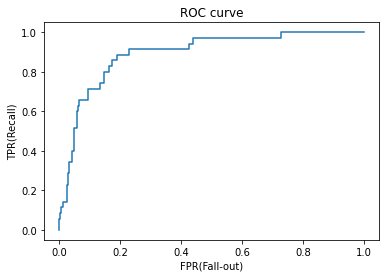

In [ ]:
print("threshold", "f1", "roc")
fpr, tpr, th = draw_roc(best_model)

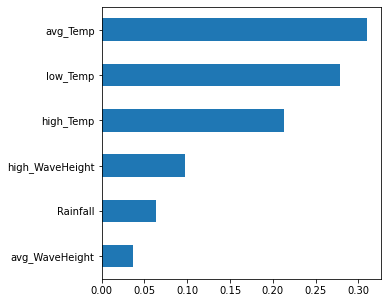

In [ ]:
# feature importance(MDI) 확인

importances = pd.Series(best_model.feature_importances_, X_val.columns)
plt.figure(figsize=(5,5))
importances.sort_values().plot.barh();

# 최종모델 일반화 성능

In [ ]:
y_test = test[target]
show_result(best_model, X_data = X_test, y_data = y_test, threshold = 0.24)

Precision Score:  0.2658
Recall Score:  0.4773
F1 Score: 0.3415
Accuracy Score: 0.8754
AUC Score: 0.8378


predict_proba 값 분포 확인해보는중


In [ ]:
xvalpred = X_val.copy()
xvalpred['pred'] = best_model.predict_proba(X_val)[:,-1]
xvalpred.sort_values(by='pred', ascending=False)

,avg_Temp,low_Temp,high_Temp,Rainfall,avg_WaveHeight,high_WaveHeight,pred
2059,24.2,20.4,28.1,0.0,0.2,0.8,0.400914
2746,25.6,23.5,28.6,0.0,0.6,1.6,0.385261
1338,24.3,21.2,27.3,0.0,0.2,1.2,0.383928
240,22.8,20.5,25.7,0.0,0.4,1.4,0.381919
267,22.6,20.1,25.9,0.0,0.2,0.9,0.381759
...,...,...,...,...,...,...,...
795,2.7,-0.7,7.4,0.0,0.2,0.5,0.000000
3237,-2.2,-4.3,2.0,0.0,0.2,0.8,0.000000
2131,10.0,7.2,13.3,0.0,0.3,1.1,0.000000
2885,3.6,-0.4,9.2,0.0,0.1,0.6,0.000000


In [ ]:
xvalpred['pred'].describe()

count    520.000000
mean       0.069480
std        0.104967
min        0.000000
25%        0.000259
50%        0.009996
75%        0.115097
max        0.400914
Name: pred, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


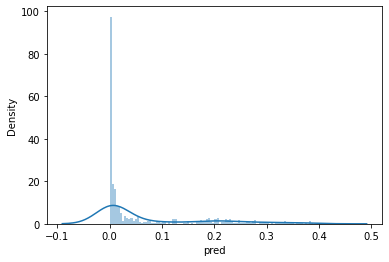

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 원본 분포 그래프(X_val)
sns.distplot(xvalpred['pred'], bins=100)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


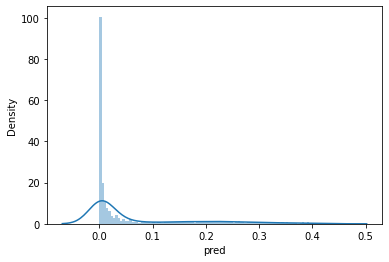

In [ ]:
x_pred = X_train.copy()
x_pred['pred'] = best_model.predict_proba(X_train)[:,-1]

# 원본 분포 그래프(X_train)
sns.distplot(x_pred['pred'], bins=100)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


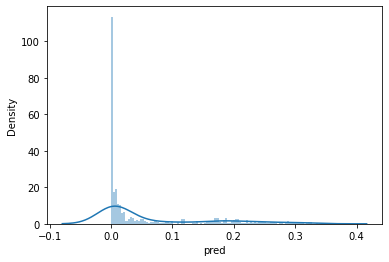

In [ ]:
# log transformation

df_log = np.log(xvalpred['pred']+1)
# plt.hist(xvalpred['pred'])
sns.distplot(df_log, bins=100);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


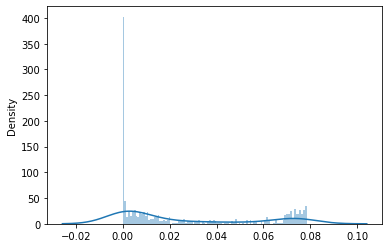

In [ ]:
# boxcox

from scipy import stats
df_boxcox = pd.Series(stats.boxcox(xvalpred['pred']+1)[0])
sns.distplot(df_boxcox, bins=100);

정규분포를 띄지도 않고, 값을 변형한후 밑에서 확률로 해석할 때 어떻게 해야할지도 모르겠다.

## 0값의 분포, 1값의 분포

In [ ]:
proba_0 = xvalpred[xvalpred['pred']<0.24].pred.sort_values()
proba_1 = xvalpred[xvalpred['pred']>=0.24].pred.sort_values()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


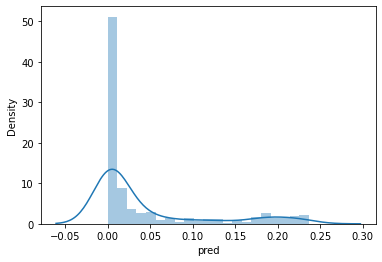

In [ ]:
sns.distplot(proba_0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


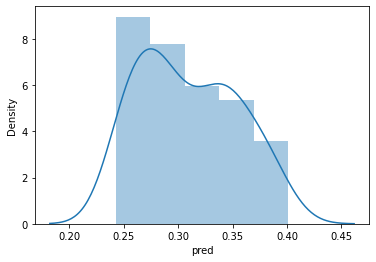

In [ ]:
sns.distplot(proba_1)

# 모델 해석

## PDP

In [ ]:
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.8 MB/s eta 

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact_plot, pdp_interact

feature = 'avg_Temp'

isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, plot_pts_dist = True);

ModuleNotFoundError: ignored

In [ ]:
features = ['avg_Temp', 'Rainfall'] 

interaction = pdp_interact(
    model=best_model, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

## SHAP

In [ ]:
# shap
import shap
explainer = shap.TreeExplainer(best_model)
shap.initjs()

shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300]) 

# api 데이터로 예측해보기

In [ ]:
def value_to_percentile(array, value):
    array = np.sort(array)
    index = np.searchsorted(array, value, side='left')
    if index == 0:
        return 0.0
    elif index == len(array):
        return 100.0
    else:
        return (index - 1) / len(array) * 100


In [ ]:
y_pred_proba = best_model.predict_proba(df_predict)[:,-1]
y_pred_proba

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- rain
- taAvg
- taMax
- taMin
- whAvg
- ...
Feature names seen at fit time, yet now missing:
- Rainfall
- avg_Temp
- avg_WaveHeight
- high_Temp
- high_WaveHeight
- ...

  warnings.warn(message, FutureWarning)


array([0.00702535, 0.02022909, 0.01415531, 0.01690497, 0.01690497,
       0.00702535, 0.00702535, 0.00702535])

### 예측에 쓰인 데이터와 예측값 정리

In [ ]:
y_pred_proba

array([0.00702535, 0.02022909, 0.01415531, 0.01690497, 0.01690497,
       0.00702535, 0.00702535, 0.00702535])

In [ ]:
result = df_predict.copy()
result['pred'] = y_pred_proba
result

,taAvg,taMin,taMax,rain,whAvg,whHigh,pred
day,,,,,,,
3,9.0,5.0,13.0,0.4,1.5,2.0,0.007025
4,11.5,10.0,13.0,1.8,1.5,3.0,0.020229
5,11.0,10.0,12.0,1.8,1.75,2.5,0.014155
6,5.5,5.0,6.0,0.8,2.0,4.0,0.016905
7,3.0,1.0,5.0,0.6,1.5,3.0,0.016905
8,2.0,-1.0,5.0,0.4,1.5,2.0,0.007025
9,2.0,-1.0,5.0,0.4,1.5,2.0,0.007025
10,3.0,0.0,6.0,0.4,1.5,2.0,0.007025


In [ ]:
# 임계값 0.24보다 작을 경우 0, 이상일 경우 1 
result['pred_result'] = np.where(result['pred'] < 0.24, 0, 1)

# 0 또는 1일 확률 제공
for i, row in result.iterrows():
    x = row['pred_result']
    if x == 0:
        result.at[i, 'prob'] = 100-(value_to_percentile(array=proba_0, value=row['pred']))
    elif x == 1:
        result.at[i, 'prob'] = value_to_percentile(array=proba_1, value=row['pred'])
result

,taAvg,taMin,taMax,rain,whAvg,whHigh,pred,pred_result,prob
day,,,,,,,,,
3,9.0,5.0,13.0,0.4,1.5,2.0,0.007025,0,50.535332
4,11.5,10.0,13.0,1.8,1.5,3.0,0.020229,0,33.832976
5,11.0,10.0,12.0,1.8,1.75,2.5,0.014155,0,39.186296
6,5.5,5.0,6.0,0.8,2.0,4.0,0.016905,0,36.188437
7,3.0,1.0,5.0,0.6,1.5,3.0,0.016905,0,36.188437
8,2.0,-1.0,5.0,0.4,1.5,2.0,0.007025,0,50.535332
9,2.0,-1.0,5.0,0.4,1.5,2.0,0.007025,0,50.535332
10,3.0,0.0,6.0,0.4,1.5,2.0,0.007025,0,50.535332


In [ ]:
result.loc[3]

taAvg                9.0
taMin                5.0
taMax               13.0
rain                 0.4
whAvg                1.5
whHigh               2.0
pred            0.007025
pred_result            0
prob           50.535332
Name: 3, dtype: object

In [ ]:
result.index

Int64Index([3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='day')

# 임의 데이터로 테스트

In [ ]:
test1 = pd.DataFrame(
    [
        [26,24,31,4,1,1],
        [30,26,33,2,1.5,2],
        [15,12,19,1,1.5,2]
    ]
)

y_pred_proba = best_model.predict_proba(test1)[:,-1]
result = test1.copy()
result['predict'] = y_pred_proba

result['pred_result'] = np.where(result['predict'] < 0.24, 0, 1)

for i, row in result.iterrows():
    x = row['pred_result']
    if x == 0:
        result.at[i, 'prob'] = 100-(value_to_percentile(array=proba_0, value=row['predict']))
    elif x == 1:
        result.at[i, 'prob'] = value_to_percentile(array=proba_1, value=row['predict'])
result

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,0,1,2,3,4,5,predict,pred_result,prob
0,26,24,31,4,1.0,1,0.265151,1,18.867925
1,30,26,33,2,1.5,2,0.291962,1,41.509434
2,15,12,19,1,1.5,2,0.010546,0,43.683084
